**Brain Tumor Detection**

Dataset: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans/data (7,023 images)

In [ ]:
pip install kagglehub

In [ ]:
!kaggle datasets download -d rm1000/brain-tumor-mri-scans


Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans
License(s): CC0-1.0
brain-tumor-mri-scans.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/brain-tumor-mri-scans.zip -d /content/brain-tumor-mri-scans/


Archive:  /content/brain-tumor-mri-scans.zip
replace /content/brain-tumor-mri-scans/glioma/0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
dataset_path = '/content/brain-tumor-mri-scans/'

# List the folders inside the dataset directory
print(os.listdir(dataset_path))


['pituitary', 'glioma', 'meningioma', 'healthy']


In [ ]:
from PIL import Image

image_dir = "/content/brain-tumor-mri-scans/"  # Change to the actual path

# Categories
categories = ["glioma", "healthy", "meningioma", "pituitary"]

# Function to check image integrity
def check_image_integrity(image_dir):
    corrupted_files = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify if the image is readable
        except (IOError, SyntaxError) as e:
            corrupted_files.append(img_file)
    return corrupted_files

# Iterate through each category and check for corrupted images
for category in categories:
    category_path = os.path.join(image_dir, category)
    corrupted = check_image_integrity(category_path)
    if corrupted:
        print(f"Corrupted images in {category}: {corrupted}")
        # Remove corrupted files
        for corrupted_img in corrupted:
            os.remove(os.path.join(category_path, corrupted_img))
    else:
        print(f"No corrupted images in {category}")


No corrupted images in glioma
No corrupted images in healthy
No corrupted images in meningioma
No corrupted images in pituitary


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# Function to normalize images: After resizing, normalize the pixel values of the images to the range [0, 1].
def normalize_images(image_dir, target_size=(128, 128)):
    images = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)
    return np.array(images)

# Normalize images in each category
all_images = []
labels = []

for i, category in enumerate(categories):
    category_path = os.path.join(image_dir, category)
    images = normalize_images(category_path)
    all_images.append(images)
    labels.extend([i] * len(images))  # Assign label based on the category

# Convert lists to numpy arrays for future model training
all_images = np.concatenate(all_images, axis=0)
labels = np.array(labels)

print("Image data and labels prepared.")


Image data and labels prepared.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 5618
Test set size: 1405


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define the original dataset directory and the new directories for train and test sets
original_dataset_dir = "/content/brain-tumor-mri-scans"
train_dir = "/content/brain-tumor-mri-scans-train"
test_dir = "/content/brain-tumor-mri-scans-test"

# Create new directories for train and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Load all images and labels
all_images = []
labels = []

for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                all_images.append(img_path)
                labels.append(category)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

# Function to copy images to the new directories
def copy_images(file_paths, labels, dest_dir):
    for img_path, label in zip(file_paths, labels):
        label_dir = os.path.join(dest_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        shutil.copy(img_path, label_dir)

# Copy images to train and test directories
copy_images(X_train, y_train, train_dir)
copy_images(X_test, y_test, test_dir)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 5618
Test set size: 1405


Jenny - KMeans

To include the AUC-ROC and cross-validation scores in your clustering analysis, let's break it down into two tasks:

AUC-ROC:

AUC-ROC (Area Under the Receiver Operating Characteristic curve) is a metric used for classification problems to evaluate how well the model can distinguish between classes.
Since KMeans is an unsupervised learning algorithm and doesn't directly provide class probabilities, we need to treat this as a multi-class classification problem and calculate the AUC-ROC score for each class using the One-vs-Rest (OvR) approach.
Cross-Validation:

Cross-validation is a technique used to evaluate the generalization ability of a model by splitting the data into multiple training and test sets. You can use cross_val_score with the KMeans model (though it may be unconventional for unsupervised tasks).

F1 Score: 0.4903460975542076
Confusion Matrix:
[[ 947   60  612    2]
 [ 179 1217  581   23]
 [ 173  632  640  200]
 [ 230  396  534  597]]
AUC-ROC Score: 0.30319670485558275
Cross-Validation Scores: [0.92170819 0.01708185 0.03487544 0.24287749 0.21866097]
Mean Cross-Validation Accuracy: 0.28704078839310154


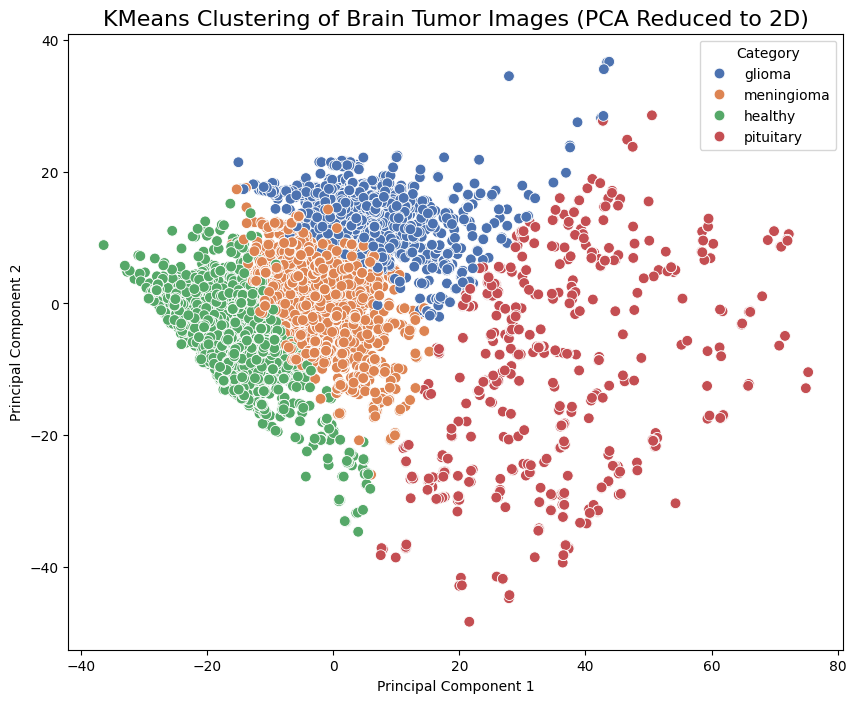

In [ ]:
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load images as arrays
image_arrays = []
for img_path in all_images:  # all_images contains file paths
    img = Image.open(img_path).resize((128, 128))  # Resize to 128x128
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    image_arrays.append(img_array)

# Convert the list to a NumPy array and flatten
image_arrays = np.array(image_arrays)
all_images_flattened = image_arrays.reshape(image_arrays.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Experiment with n_components as needed
all_images_pca = pca.fit_transform(all_images_flattened)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=len(categories), random_state=42)
kmeans_labels = kmeans.fit_predict(all_images_pca)

# Map clusters to categories based on the most frequent label in each cluster
cluster_to_category = {}
for cluster_id in range(len(categories)):
    cluster_indices = np.where(kmeans_labels == cluster_id)[0]
    cluster_labels = labels[cluster_indices]  # True labels of images in this cluster
    most_common_label = np.bincount(cluster_labels).argmax()  # Find the most frequent label
    cluster_to_category[cluster_id] = categories[most_common_label]  # Map cluster to category

# Update kmeans_labels to reflect the category names
kmeans_category_labels = [cluster_to_category[label] for label in kmeans_labels]

# Evaluate clustering performance using metrics
f1 = f1_score(labels, kmeans_labels, average='weighted')
conf_matrix = confusion_matrix(labels, kmeans_labels)

# For AUC-ROC, we need to convert the labels to one-hot encoded format and calculate OvR AUC-ROC
labels_bin = label_binarize(labels, classes=range(len(categories)))  # One-hot encoding
# Calculate AUC-ROC using cluster labels and one-hot encoded true labels
roc_auc = roc_auc_score(labels_bin, np.expand_dims(kmeans_labels, axis=1), multi_class='ovr')  # AUC-ROC for multi-class

# Perform cross-validation using KMeans
cross_val_scores = cross_val_score(kmeans, all_images_pca, labels, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print results
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC-ROC Score: {roc_auc}")
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")

# Create a 2D scatter plot using the first two components from PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=all_images_pca[:, 0], y=all_images_pca[:, 1], hue=kmeans_category_labels, palette="deep", s=60)

# Add labels and title
plt.title("KMeans Clustering of Brain Tumor Images (PCA Reduced to 2D)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Category', loc='upper right')

# Show plot
plt.show()
